# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Sugar.csv', index_col = 'Date', parse_dates=True)

In [6]:
df

,Price
Date,
2021-06-01,74.0
2021-06-02,74.0
2021-06-03,71.0
2021-06-04,71.0
2021-06-05,71.0
...,...
2022-11-26,115.0
2022-11-27,115.0
2022-11-28,115.0


In [7]:
df.dropna()

,Price
Date,
2021-06-01,74.0
2021-06-02,74.0
2021-06-03,71.0
2021-06-04,71.0
2021-06-05,71.0
...,...
2022-11-26,115.0
2022-11-27,115.0
2022-11-28,115.0


In [12]:
df.describe()

,Price
count,548.000000
mean,81.483577
std,10.224523
min,69.000000
25%,77.500000
50%,79.000000
75%,81.500000
max,115.000000


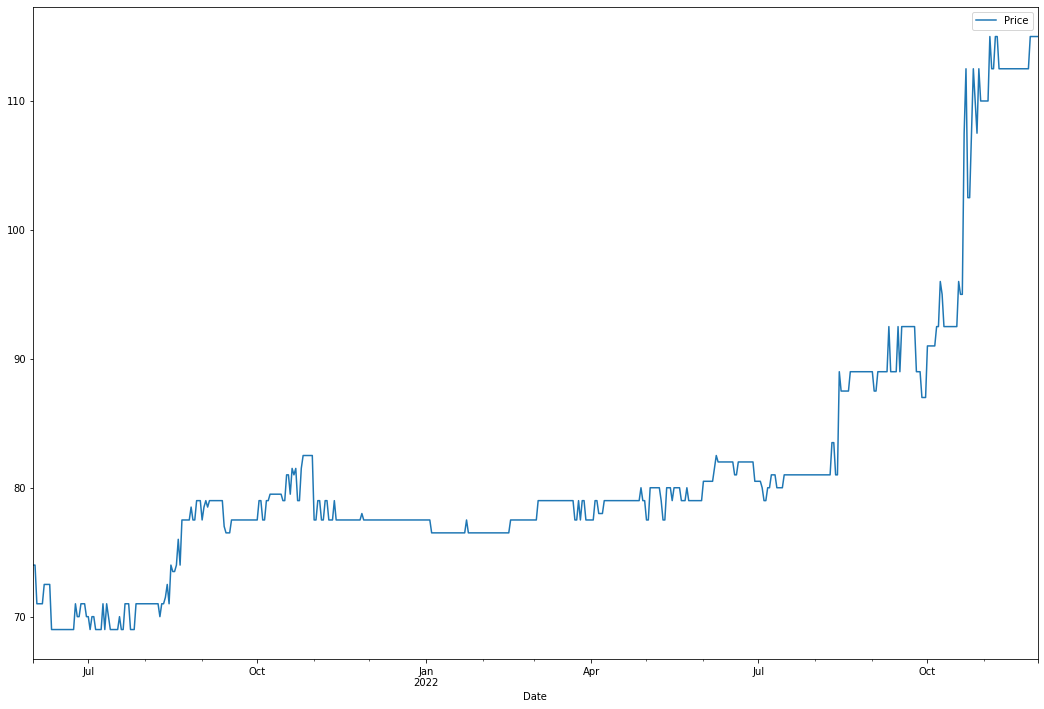

In [8]:
df.plot(figsize = (18, 12));

In [9]:
results = seasonal_decompose(df['Price'], model = 'addtive')

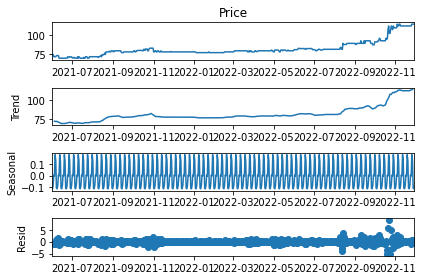

In [10]:
results.plot();

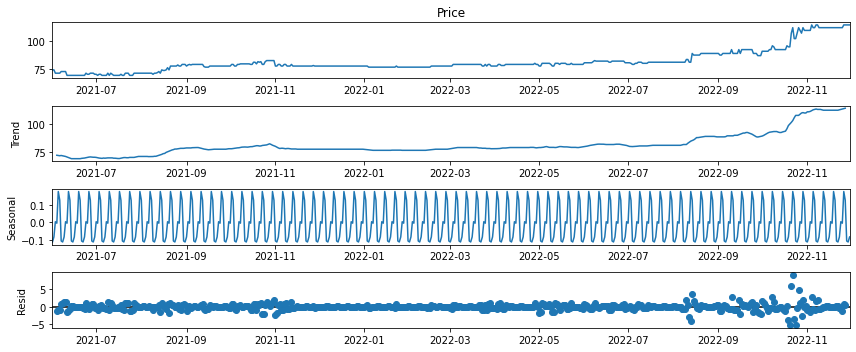

In [14]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

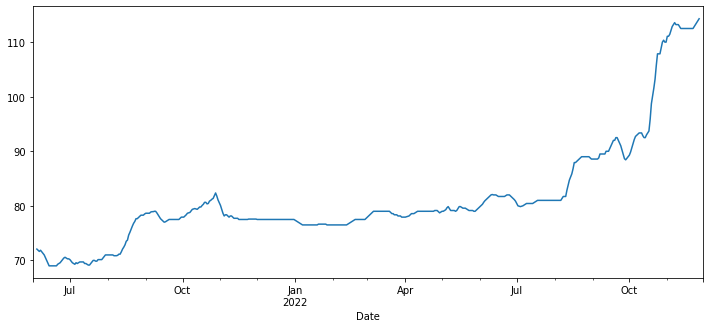

In [15]:
results.trend.plot()

In [16]:
df.index.freq = 'D'

In [17]:
df.head()

,Price
Date,
2021-06-01,74.0
2021-06-02,74.0
2021-06-03,71.0
2021-06-04,71.0
2021-06-05,71.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [19]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [20]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [21]:
test_predictions = fitted_model.forecast(49)

In [22]:
test_predictions

2022-10-14    92.654040
2022-10-15    93.216595
2022-10-16    92.904098
2022-10-17    93.091524
2022-10-18    92.935295
2022-10-19    92.935268
2022-10-20    93.466546
2022-10-21    93.435275
2022-10-22    93.341566
2022-10-23    93.497821
2022-10-24    93.478397
2022-10-25    93.184278
2022-10-26    92.919586
2022-10-27    92.684300
2022-10-28    92.448944
2022-10-29    92.596057
2022-10-30    92.948976
2022-10-31    93.096034
2022-11-01    93.007799
2022-11-02    92.948905
2022-11-03    93.066634
2022-11-04    93.037142
2022-11-05    93.154745
2022-11-06    93.095888
2022-11-07    93.184073
2022-11-08    93.419405
2022-11-09    93.419436
2022-11-10    93.125364
2022-11-11    93.213576
2022-11-12    93.919415
2022-11-13    93.810788
2022-11-14    94.373343
2022-11-15    94.060845
2022-11-16    94.248271
2022-11-17    94.092043
2022-11-18    94.092016
2022-11-19    94.623294
2022-11-20    94.592023
2022-11-21    94.498314
2022-11-22    94.654569
2022-11-23    94.635145
2022-11-24    94

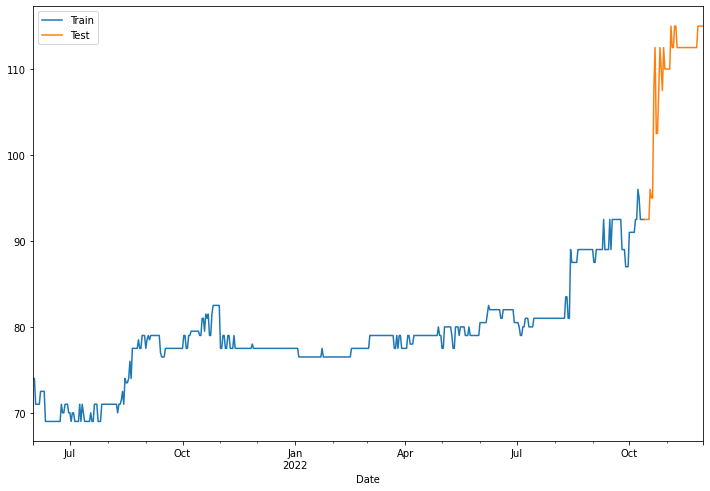

In [23]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [24]:
test_data.describe()

,Price
count,49.000000
mean,108.795918
std,7.324274
min,92.500000
25%,107.500000
50%,112.500000
75%,112.500000
max,115.000000


In [25]:
mean_absolute_error(test_data,test_predictions)


15.35419406448562

In [26]:
mean_squared_error(test_data, test_predictions)

281.87021400065055

In [27]:
from statsmodels.tools.eval_measures import rmse

In [28]:
rmse(test_data, test_predictions)

array([17.69492642, 17.18329122, 17.4671164 , 17.29676858, 17.43873724,
       17.43876147, 16.95699973, 16.98527413, 17.07006706, 16.92873216,
       16.9462875 , 17.21259693, 17.45302611, 17.66732674, 17.88221931,
       17.74783648, 17.42629493, 17.29267349, 17.37282101, 17.42635969,
       17.31936947, 17.34615833, 17.23938738, 17.29280586, 17.21278312,
       16.99962819, 16.99959953, 17.26604911, 17.18602884, 16.54873237,
       16.64645064, 16.14189778, 16.42171003, 16.25374472, 16.39372248,
       16.39374638, 15.91896565, 15.94681222, 16.03033612, 15.89112815,
       15.90841611, 16.17077904, 16.40781391, 16.61921593, 16.83131533,
       16.69866622, 16.38145253, 16.24970785, 16.32872398])

In [29]:
np.sqrt(mean_squared_error(test_data, test_predictions))

16.788990857125707

In [30]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [31]:
forecast_predictions = final_model.forecast(60)

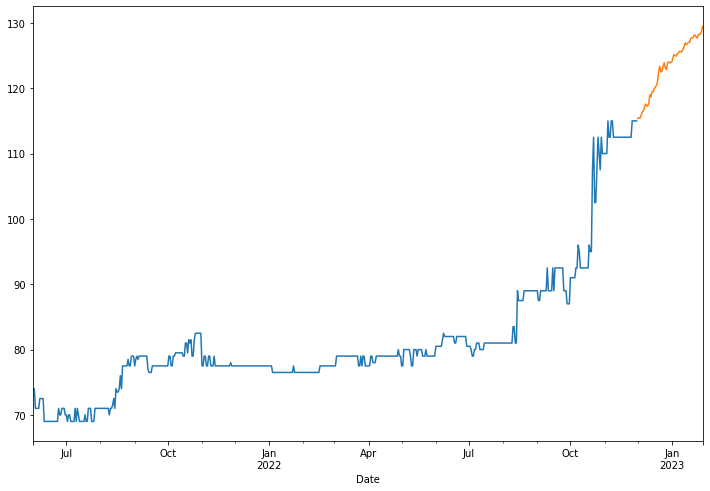

In [32]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [33]:

forecast_predictions

2022-12-01    115.380735
2022-12-02    115.497810
2022-12-03    115.392174
2022-12-04    115.786095
2022-12-05    116.290702
2022-12-06    116.517031
2022-12-07    116.909688
2022-12-08    117.579547
2022-12-09    117.360156
2022-12-10    117.251452
2022-12-11    117.697752
2022-12-12    118.976979
2022-12-13    118.700227
2022-12-14    119.478549
2022-12-15    119.478725
2022-12-16    119.922715
2022-12-17    120.199751
2022-12-18    120.420735
2022-12-19    121.085602
2022-12-20    122.639001
2022-12-21    123.358651
2022-12-22    122.466660
2022-12-23    122.629790
2022-12-24    123.348056
2022-12-25    123.899109
2022-12-26    123.172026
2022-12-27    122.833332
2022-12-28    123.827591
2022-12-29    124.043541
2022-12-30    123.870177
2022-12-31    123.974142
2023-01-01    124.077735
2023-01-02    124.736310
2023-01-03    125.172322
2023-01-04    124.941182
2023-01-05    124.931816
2023-01-06    125.310895
2023-01-07    125.411698
2023-01-08    125.678789
2023-01-09    125.556452


# *SARIMAX*

In [34]:
from datetime import datetime

In [35]:
df_KN = pd.read_csv('Sugar.csv', index_col = 'Date', parse_dates = True)

In [36]:
df_KN.index.freq ='D'

In [37]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [38]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [39]:
adf_test(df_KN['Price'])

ADF Statistics: 1.3401583334825742
p- value: 0.9968245868090563
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [40]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [41]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,74.0,NaN
2021-06-02,74.0,0.0
2021-06-03,71.0,-3.0
2021-06-04,71.0,0.0
2021-06-05,71.0,0.0


In [42]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: 1.3401583334825742
p- value: 0.9968245868090563
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [44]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -9.843265658961771
p- value: 4.6918262957252295e-17
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [45]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [46]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -3.601108273491561
p- value: 0.005739875254628881
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


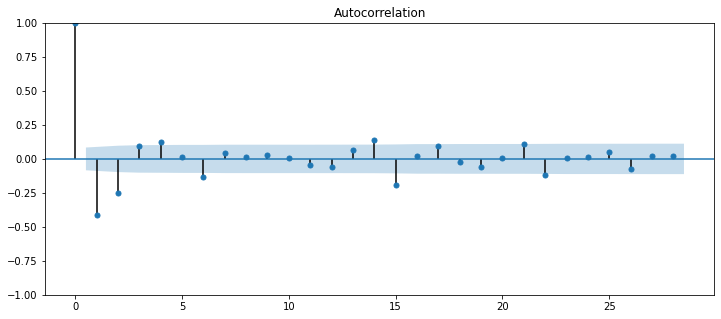

In [47]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

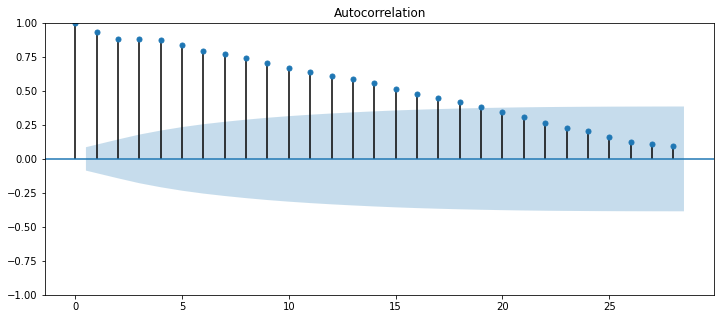

In [48]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

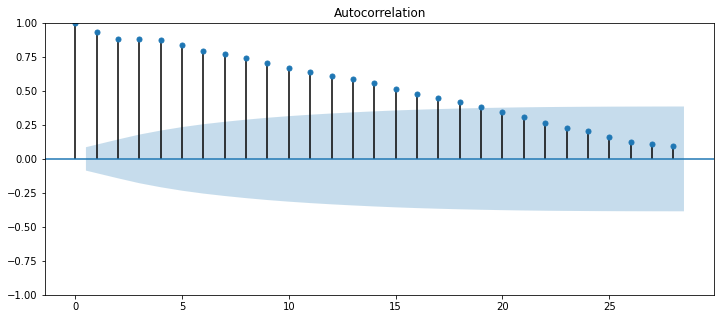

In [49]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

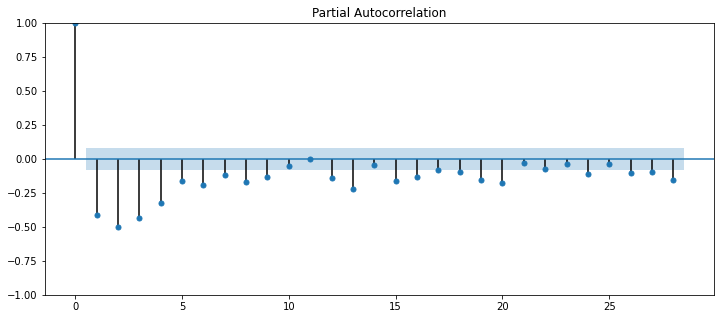

In [50]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [51]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [52]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [53]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [54]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,91.0,0.0,-4.0,3.5
2022-10-03,91.0,0.0,0.0,3.5
2022-10-04,91.0,0.0,0.0,2.0
2022-10-05,91.0,0.0,0.0,2.0
2022-10-06,92.5,1.5,1.5,3.5
2022-10-07,92.5,0.0,-1.5,3.5
2022-10-08,96.0,3.5,3.5,7.0
2022-10-09,95.0,-1.0,-4.5,6.0
2022-10-10,92.5,-2.5,-1.5,0.0


In [55]:
import statsmodels.api as sm

In [56]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from pmdarima import ARIMA

In [59]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,74.0,NaN,NaN,NaN
2021-06-02,74.0,0.0,NaN,NaN
2021-06-03,71.0,-3.0,-3.0,NaN
2021-06-04,71.0,0.0,3.0,NaN
2021-06-05,71.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,89.0,0.0,0.0,0.0
2022-09-28,87.0,-2.0,-2.0,-2.0
2022-09-29,87.0,0.0,2.0,-2.0


In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(1,2,1),seasonal_order=(1,2,1,30))

In [78]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [79]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  488
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 30)   Log Likelihood                -702.256
Date:                            Fri, 06 Jan 2023   AIC                           1414.513
Time:                                    22:34:24   BIC                           1434.785
Sample:                                06-01-2021   HQIC                          1422.521
                                     - 10-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2256      0.052     -4.314      0.000      -0.328      -0.123
ma.L1         -0.9988      0.218     -4.574      0.000      -1.427      -0.571
ar.S.L30      -0.5145      0.037    -14.058      0.000      -0.586      -0.443
ma.S.L30      -0.9974      2.416     -0.413      0.680      -5.733       3.738
sigma2         1.1855      2.744      0.432      0.666      -4.194       6.565
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              1040.07
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.21
Prob(H) (two-sided):                  0.70   Kurtosis:                        10.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [81]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

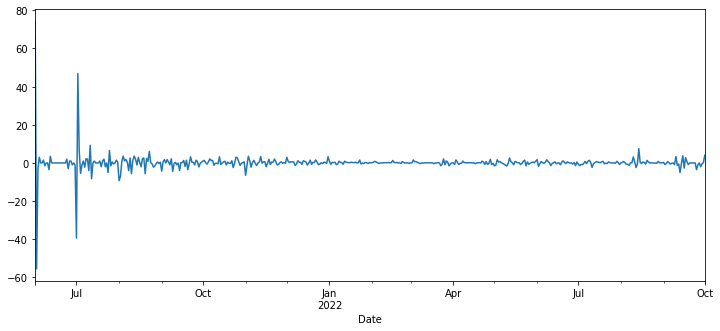

In [82]:
model_SARIMAX_fit.resid.plot()

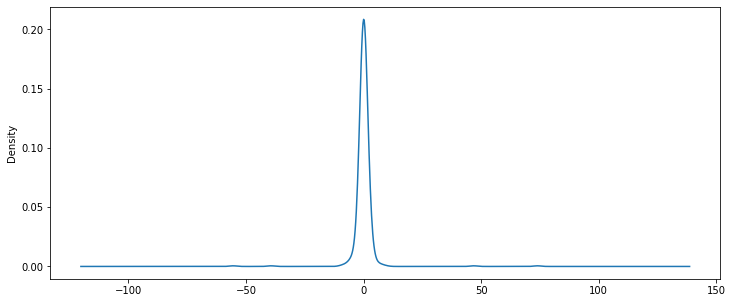

In [83]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [84]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [85]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,91.0,0.0,-4.0,3.5,89.175664
2022-10-03,91.0,0.0,0.0,3.5,89.437825
2022-10-04,91.0,0.0,0.0,2.0,90.383265
2022-10-05,91.0,0.0,0.0,2.0,90.415608
2022-10-06,92.5,1.5,1.5,3.5,90.435207
2022-10-07,92.5,0.0,-1.5,3.5,90.421784
2022-10-08,96.0,3.5,3.5,7.0,90.407699
2022-10-09,95.0,-1.0,-4.5,6.0,91.769910
2022-10-10,92.5,-2.5,-1.5,0.0,93.699603


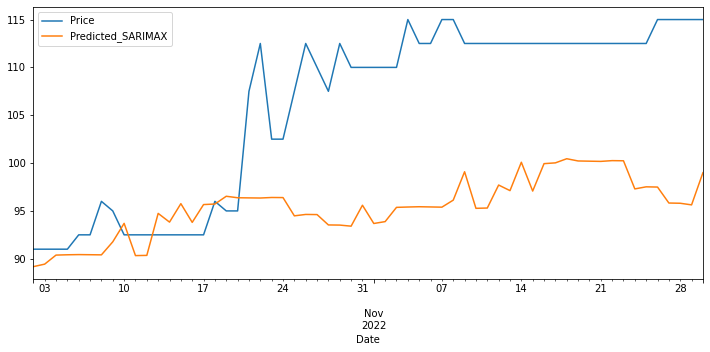

In [86]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [87]:
pred_Sarimax

2022-10-02     89.175664
2022-10-03     89.437825
2022-10-04     90.383265
2022-10-05     90.415608
2022-10-06     90.435207
2022-10-07     90.421784
2022-10-08     90.407699
2022-10-09     91.769910
2022-10-10     93.699603
2022-10-11     90.329894
2022-10-12     90.351849
2022-10-13     94.741571
2022-10-14     93.830067
2022-10-15     95.759755
2022-10-16     93.802134
2022-10-17     95.664053
2022-10-18     95.719899
2022-10-19     96.531634
2022-10-20     96.376004
2022-10-21     96.361984
2022-10-22     96.348270
2022-10-23     96.403024
2022-10-24     96.393849
2022-10-25     94.484779
2022-10-26     94.632049
2022-10-27     94.617143
2022-10-28     93.534246
2022-10-29     93.519297
2022-10-30     93.406458
2022-10-31     95.594646
2022-11-01     93.685599
2022-11-02     93.882210
2022-11-03     95.371418
2022-11-04     95.407869
2022-11-05     95.437301
2022-11-06     95.414992
2022-11-07     95.392306
2022-11-08     96.127623
2022-11-09     99.093943
2022-11-10     95.271086


In [88]:
predicted_value_SARIMA = pred_Sarimax

In [89]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [90]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

10.87190934179726

In [91]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

162.2227455157955

In [92]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

12.736669325840076

# ***FB Prophet***

In [93]:
df_fb  = pd.read_csv('Sugar.csv')

In [94]:
df_fb.columns = ['ds', 'y']

In [95]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [96]:
df_fb.head()

,ds,y
0,2021-06-01,74.0
1,2021-06-02,74.0
2,2021-06-03,71.0
3,2021-06-04,71.0
4,2021-06-05,71.0


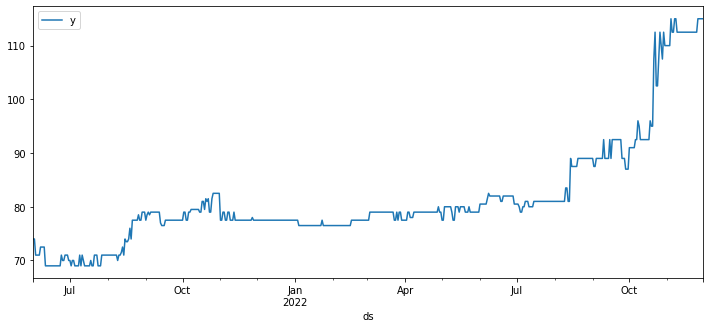

In [97]:
df_fb.plot(x='ds', y='y')

In [98]:
len(df_fb)

548

In [99]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [100]:
import prophet

In [101]:
import io, os, sys, setuptools, tokenize

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
from fbprophet import Prophet

In [103]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,97.241698,94.489026,100.142470,95.217259,99.600862,-0.019860,-0.019860,-0.019860,-0.019860,-0.019860,-0.019860,0.0,0.0,0.0,97.221837
544,2022-11-27,97.353366,94.697961,100.402790,95.285326,99.771545,0.161997,0.161997,0.161997,0.161997,0.161997,0.161997,0.0,0.0,0.0,97.515363
545,2022-11-28,97.465035,94.665786,100.455714,95.317035,99.940699,-0.046668,-0.046668,-0.046668,-0.046668,-0.046668,-0.046668,0.0,0.0,0.0,97.418367
546,2022-11-29,97.576704,94.720275,100.526599,95.334294,100.127084,-0.085298,-0.085298,-0.085298,-0.085298,-0.085298,-0.085298,0.0,0.0,0.0,97.491406
547,2022-11-30,97.688372,94.634035,100.996437,95.388178,100.328879,-0.026666,-0.026666,-0.026666,-0.026666,-0.026666,-0.026666,0.0,0.0,0.0,97.661706


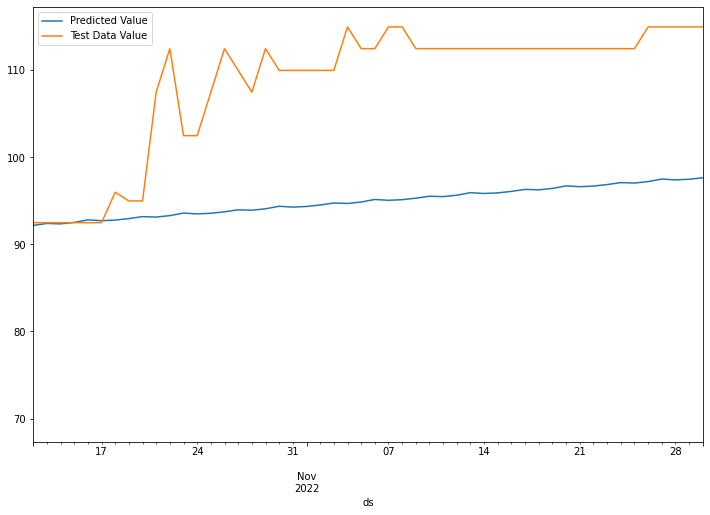

In [105]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [106]:
from statsmodels.tools.eval_measures import rmse

In [107]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [108]:
predictions_fb

488    91.261925
489    91.164928
490    91.237967
491    91.408268
492    91.635216
493    91.586152
494    91.750079
495    92.043605
496    91.946608
497    92.019647
498    92.189948
499    92.416895
500    92.367832
501    92.531759
502    92.825284
503    92.728288
504    92.801327
505    92.971628
506    93.198575
507    93.149512
508    93.313438
509    93.606964
510    93.509968
511    93.583007
512    93.753307
513    93.980255
514    93.931192
515    94.095118
516    94.388644
517    94.291648
518    94.364686
519    94.534987
520    94.761935
521    94.712871
522    94.876798
523    95.170324
524    95.073328
525    95.146366
526    95.316667
527    95.543615
528    95.494551
529    95.658478
530    95.952004
531    95.855007
532    95.928046
533    96.098347
534    96.325294
535    96.276231
536    96.440158
537    96.733683
538    96.636687
539    96.709726
540    96.880027
541    97.106974
542    97.057911
543    97.221837
544    97.515363
545    97.418367
546    97.4914

In [109]:
test_fb

,ds,y
488,2022-10-02,91.0
489,2022-10-03,91.0
490,2022-10-04,91.0
491,2022-10-05,91.0
492,2022-10-06,92.5
493,2022-10-07,92.5
494,2022-10-08,96.0
495,2022-10-09,95.0
496,2022-10-10,92.5
497,2022-10-11,92.5


In [110]:
mean_absolute_error(test_fb['y'], predictions_fb)

11.46940790579689

In [111]:
mean_squared_error(test_fb['y'], predictions_fb)

186.0928885246869

In [112]:
rmse(predictions_fb, test_fb['y'])

13.6415867304609

In [113]:
test_fb.mean()

y    105.808333
dtype: float64

In [114]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [115]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [116]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [117]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,81.550264,80.278145,82.841760,81.0,2022-08-02
1,2022-08-04,81.671163,80.384015,82.978187,81.0,2022-08-02
2,2022-08-05,81.652130,80.304659,82.873788,81.0,2022-08-02
3,2022-08-06,81.552736,80.243890,82.862645,81.0,2022-08-02
4,2022-08-07,81.767268,80.391429,83.094306,81.0,2022-08-02


In [118]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,0.406359,0.637463,0.633009,0.007815,0.007757,1.000000
1,7 days,0.416145,0.645093,0.641507,0.007920,0.007757,1.000000
2,8 days,0.872762,0.934217,0.827331,0.010104,0.007757,0.833333
3,9 days,1.264034,1.124293,0.996176,0.012086,0.008468,0.666667
4,10 days,1.324026,1.150663,1.040014,0.012627,0.009772,0.666667
5,11 days,1.311440,1.145181,1.031531,0.012522,0.009458,0.666667
6,12 days,9.579231,3.095033,2.108965,0.024517,0.015007,0.500000
7,13 days,14.994709,3.872300,2.964069,0.034197,0.020667,0.333333
8,14 days,19.944942,4.465976,3.622237,0.041556,0.042725,0.333333
9,15 days,24.751487,4.975087,4.281782,0.048942,0.064882,0.333333


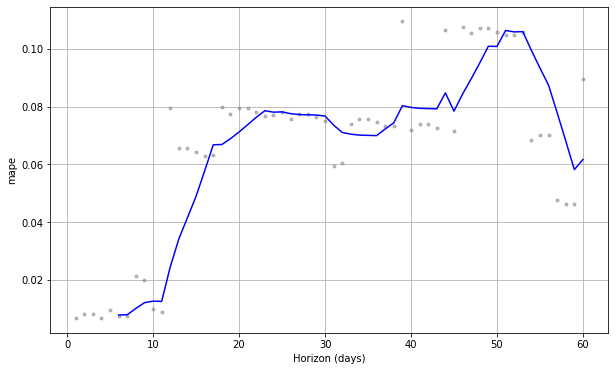

In [119]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [120]:
df_t = pd.read_csv('Sugar.csv')

In [121]:
df_t.columns = ['ds', 'y']

In [122]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [123]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [124]:
t.fit(df_t)

In [125]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

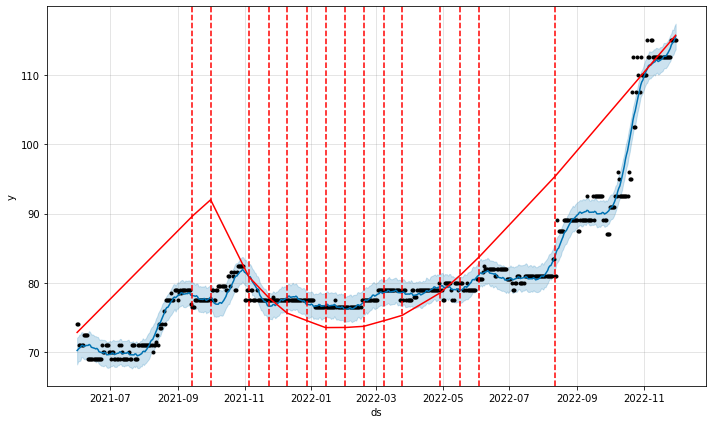

In [126]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [127]:
df_S = pd.read_csv('Sugar.csv')

In [128]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


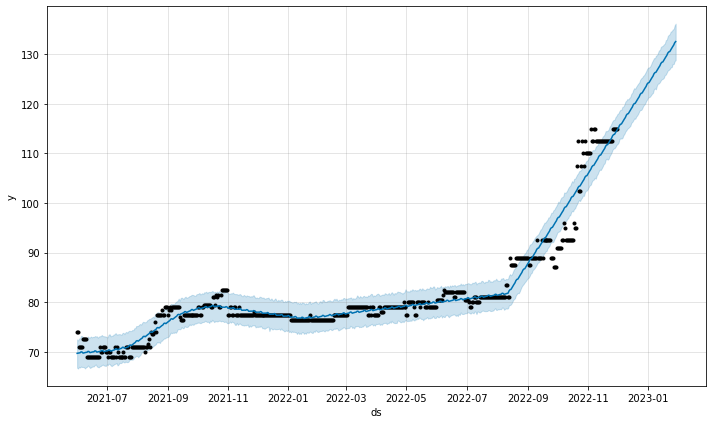

In [129]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

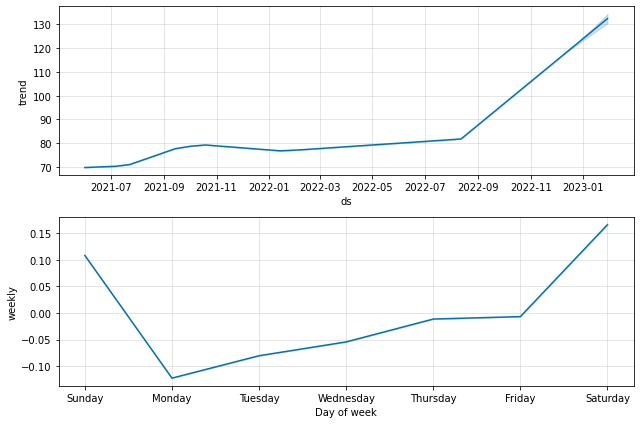

In [130]:
figure = S.plot_components(forecast);

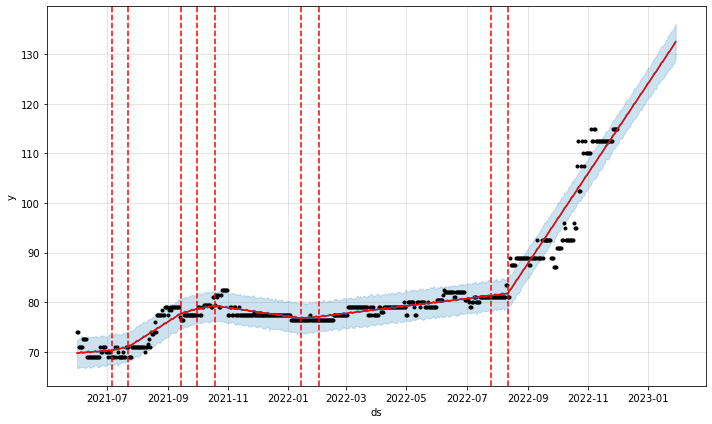

In [131]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


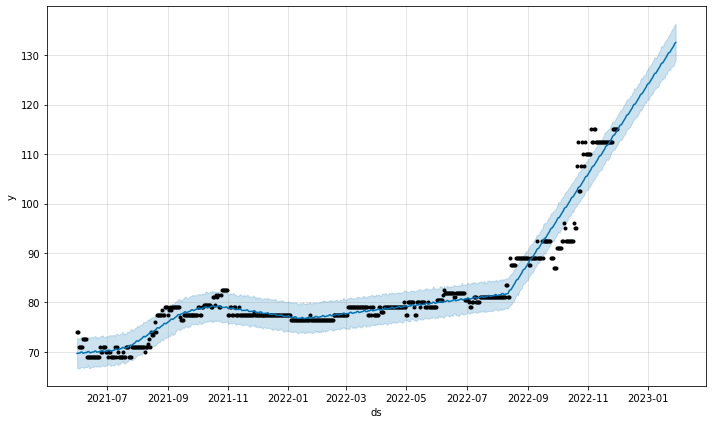

In [132]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

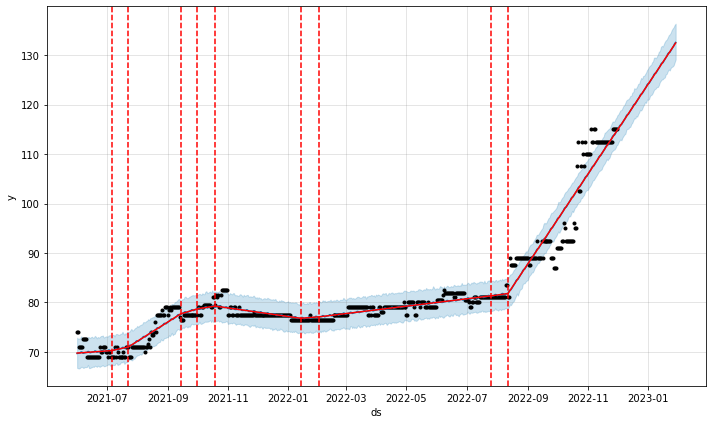

In [133]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

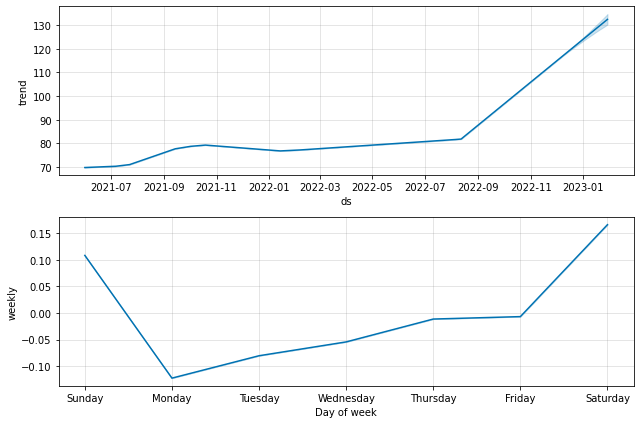

In [134]:
figure = S.plot_components(forecast)

# ***LSTM***

In [135]:
df_LSTM=pd.read_csv("Sugar.csv",parse_dates=["Date"],index_col=[0])

In [136]:
print(df_LSTM.index.freq)

None


In [137]:
test_split=round(len(df_LSTM)*0.20)

In [138]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [139]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [140]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [141]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [142]:
df_for_training_scaled

array([[0.34482759],
       [0.34482759],
       [0.13793103],
       [0.13793103],
       [0.13793103],
       [0.13793103],
       [0.24137931],
       [0.24137931],
       [0.24137931],
       [0.24137931],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13793103],
       [0.06896552],
       [0.06896552],
       [0.13793103],
       [0.13793103],
       [0.13793103],
       [0.06896552],
       [0.06896552],
       [0.        ],
       [0.06896552],
       [0.06896552],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13793103],
       [0.        ],
       [0.13793103],
       [0.06896552],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.068

In [143]:
df_for_training_scaled.shape

(438, 1)

In [144]:
df_for_testing_scaled.shape

(110, 1)

In [145]:

def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [146]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [147]:
trainX.shape

(408, 30, 1)

In [148]:
testX,testY=createXY(df_for_testing_scaled,30)

In [149]:
trainX[0]

array([[0.34482759],
       [0.34482759],
       [0.13793103],
       [0.13793103],
       [0.13793103],
       [0.13793103],
       [0.24137931],
       [0.24137931],
       [0.24137931],
       [0.24137931],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13793103],
       [0.06896552],
       [0.06896552],
       [0.13793103],
       [0.13793103],
       [0.13793103],
       [0.06896552]])

In [150]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [151]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [152]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.34482759]
 [0.34482759]
 [0.13793103]
 [0.13793103]
 [0.13793103]
 [0.13793103]
 [0.24137931]
 [0.24137931]
 [0.24137931]
 [0.24137931]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.13793103]
 [0.06896552]
 [0.06896552]
 [0.13793103]
 [0.13793103]
 [0.13793103]
 [0.06896552]]

trainY[0]--  0.068965517241379


In [153]:
trainY[0]

0.068965517241379

In [154]:
trainY.shape

(408,)

In [155]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [156]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 8s 215ms/step - loss: 0.0727 - val_loss: 0.9997
Epoch 2/32
13/13 [==============================] - 1s 69ms/step - loss: 0.0169 - val_loss: 0.6700
Epoch 3/32
13/13 [==============================] - 1s 62ms/step - loss: 0.0103 - val_loss: 0.9692
Epoch 4/32
13/13 [==============================] - 1s 53ms/step - loss: 0.0088 - val_loss: 0.8291
Epoch 5/32
13/13 [==============================] - 1s 52ms/step - loss: 0.0067 - val_loss: 0.6800
Epoch 6/32
13/13 [==============================] - 0s 36ms/step - loss: 0.0076 - val_loss: 0.6980
Epoch 7/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0081 - val_loss: 0.6543
Epoch 8/32
13/13 [==============================] - 0s 37ms/step - loss: 0.0071 - val_loss: 0.6267
Epoch 9/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0072 - val_loss: 0.6083
Epoch 10/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0067 - val_loss: 0.5501
Epoch 11

In [157]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 32, 'optimizer': 'adam'}

In [158]:
my_model=grid_search.best_estimator_.model

In [159]:
my_model

In [160]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 10ms/step


In [161]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[1.3496466]
 [1.34664  ]
 [1.337135 ]
 [1.3258361]
 [1.3560953]
 [1.3550045]
 [1.3851435]
 [1.4202067]
 [1.4510885]
 [1.4742012]
 [1.4889879]
 [1.4965479]
 [1.4986542]
 [1.4971473]
 [1.4515971]
 [1.3990759]
 [1.3520973]
 [1.2924997]
 [1.2401553]
 [1.2003288]
 [1.2184802]
 [1.2588121]
 [1.3048617]
 [1.3470472]
 [1.3807138]
 [1.422381 ]
 [1.4581946]
 [1.5265826]
 [1.5799618]
 [1.5857211]
 [1.5714961]
 [1.5494101]
 [1.52634  ]
 [1.5059388]
 [1.4897289]
 [1.4781802]
 [1.4707395]
 [1.5087261]
 [1.5442654]
 [1.5738459]
 [1.7477492]
 [1.9966898]
 [2.0923903]
 [2.1150534]
 [2.163782 ]
 [2.2606874]
 [2.3122096]
 [2.3048806]
 [2.3395305]
 [2.340873 ]
 [2.331051 ]
 [2.3177817]
 [2.3046296]
 [2.2932835]
 [2.3441026]
 [2.368292 ]
 [2.381007 ]
 [2.4163833]
 [2.4474905]
 [2.4400861]
 [2.4243279]
 [2.4086952]
 [2.3958766]
 [2.3864565]
 [2.3801396]
 [2.3763146]
 [2.3743267]
 [2.37355  ]
 [2.3735914]
 [2.3740907]
 [2.3746676]
 [2.375282 ]
 [2.3760047]
 [2.376647 ]
 [2.3771348]
 [2.3774788]


In [162]:
scaler.inverse_transform(prediction)

array([[ 88.56988 ],
       [ 88.52628 ],
       [ 88.38846 ],
       [ 88.224625],
       [ 88.66338 ],
       [ 88.64756 ],
       [ 89.08458 ],
       [ 89.592995],
       [ 90.04079 ],
       [ 90.375916],
       [ 90.590324],
       [ 90.69994 ],
       [ 90.73049 ],
       [ 90.70863 ],
       [ 90.04816 ],
       [ 89.286606],
       [ 88.60541 ],
       [ 87.74124 ],
       [ 86.982254],
       [ 86.40477 ],
       [ 86.66796 ],
       [ 87.25278 ],
       [ 87.920494],
       [ 88.53219 ],
       [ 89.020355],
       [ 89.62453 ],
       [ 90.14382 ],
       [ 91.13545 ],
       [ 91.90945 ],
       [ 91.99296 ],
       [ 91.78669 ],
       [ 91.466446],
       [ 91.13193 ],
       [ 90.83611 ],
       [ 90.60107 ],
       [ 90.43361 ],
       [ 90.32572 ],
       [ 90.876526],
       [ 91.391846],
       [ 91.82076 ],
       [ 94.34237 ],
       [ 97.952   ],
       [ 99.33965 ],
       [ 99.668274],
       [100.37483 ],
       [101.77997 ],
       [102.52704 ],
       [102.4

In [163]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [164]:
prediction_copies_array.shape

(80, 1)

In [165]:
prediction_copies_array

array([[1.3496466],
       [1.34664  ],
       [1.337135 ],
       [1.3258361],
       [1.3560953],
       [1.3550045],
       [1.3851435],
       [1.4202067],
       [1.4510885],
       [1.4742012],
       [1.4889879],
       [1.4965479],
       [1.4986542],
       [1.4971473],
       [1.4515971],
       [1.3990759],
       [1.3520973],
       [1.2924997],
       [1.2401553],
       [1.2003288],
       [1.2184802],
       [1.2588121],
       [1.3048617],
       [1.3470472],
       [1.3807138],
       [1.422381 ],
       [1.4581946],
       [1.5265826],
       [1.5799618],
       [1.5857211],
       [1.5714961],
       [1.5494101],
       [1.52634  ],
       [1.5059388],
       [1.4897289],
       [1.4781802],
       [1.4707395],
       [1.5087261],
       [1.5442654],
       [1.5738459],
       [1.7477492],
       [1.9966898],
       [2.0923903],
       [2.1150534],
       [2.163782 ],
       [2.2606874],
       [2.3122096],
       [2.3048806],
       [2.3395305],
       [2.340873 ],


In [166]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [167]:
pred

array([ 88.56988 ,  88.52628 ,  88.38846 ,  88.224625,  88.66338 ,
        88.64756 ,  89.08458 ,  89.592995,  90.04079 ,  90.375916,
        90.590324,  90.69994 ,  90.73049 ,  90.70863 ,  90.04816 ,
        89.286606,  88.60541 ,  87.74124 ,  86.982254,  86.40477 ,
        86.66796 ,  87.25278 ,  87.920494,  88.53219 ,  89.020355,
        89.62453 ,  90.14382 ,  91.13545 ,  91.90945 ,  91.99296 ,
        91.78669 ,  91.466446,  91.13193 ,  90.83611 ,  90.60107 ,
        90.43361 ,  90.32572 ,  90.876526,  91.391846,  91.82076 ,
        94.34237 ,  97.952   ,  99.33965 ,  99.668274, 100.37483 ,
       101.77997 , 102.52704 , 102.42077 , 102.923195, 102.94266 ,
       102.80024 , 102.607834, 102.41713 , 102.25261 , 102.98949 ,
       103.34023 , 103.5246  , 104.03756 , 104.48861 , 104.38125 ,
       104.152756, 103.92608 , 103.74021 , 103.60362 , 103.512024,
       103.456566, 103.427734, 103.41647 , 103.417076, 103.42432 ,
       103.43268 , 103.44159 , 103.45207 , 103.46138 , 103.468

In [168]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [169]:
pred

array([ 88.56988 ,  88.52628 ,  88.38846 ,  88.224625,  88.66338 ,
        88.64756 ,  89.08458 ,  89.592995,  90.04079 ,  90.375916,
        90.590324,  90.69994 ,  90.73049 ,  90.70863 ,  90.04816 ,
        89.286606,  88.60541 ,  87.74124 ,  86.982254,  86.40477 ,
        86.66796 ,  87.25278 ,  87.920494,  88.53219 ,  89.020355,
        89.62453 ,  90.14382 ,  91.13545 ,  91.90945 ,  91.99296 ,
        91.78669 ,  91.466446,  91.13193 ,  90.83611 ,  90.60107 ,
        90.43361 ,  90.32572 ,  90.876526,  91.391846,  91.82076 ,
        94.34237 ,  97.952   ,  99.33965 ,  99.668274, 100.37483 ,
       101.77997 , 102.52704 , 102.42077 , 102.923195, 102.94266 ,
       102.80024 , 102.607834, 102.41713 , 102.25261 , 102.98949 ,
       103.34023 , 103.5246  , 104.03756 , 104.48861 , 104.38125 ,
       104.152756, 103.92608 , 103.74021 , 103.60362 , 103.512024,
       103.456566, 103.427734, 103.41647 , 103.417076, 103.42432 ,
       103.43268 , 103.44159 , 103.45207 , 103.46138 , 103.468

In [170]:

print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [ 88.56988   88.52628   88.38846   88.224625  88.66338   88.64756
  89.08458   89.592995  90.04079   90.375916  90.590324  90.69994
  90.73049   90.70863   90.04816   89.286606  88.60541   87.74124
  86.982254  86.40477   86.66796   87.25278   87.920494  88.53219
  89.020355  89.62453   90.14382   91.13545   91.90945   91.99296
  91.78669   91.466446  91.13193   90.83611   90.60107   90.43361
  90.32572   90.876526  91.391846  91.82076   94.34237   97.952
  99.33965   99.668274 100.37483  101.77997  102.52704  102.42077
 102.923195 102.94266  102.80024  102.607834 102.41713  102.25261
 102.98949  103.34023  103.5246   104.03756  104.48861  104.38125
 104.152756 103.92608  103.74021  103.60362  103.512024 103.456566
 103.427734 103.41647  103.417076 103.42432  103.43268  103.44159
 103.45207  103.46138  103.46845  103.47344  103.90577  104.33579
 104.66544  104.88615 ]

Original Values--  [ 89.   89.   89.   92.5  89.   92.5  92.5  92.5  92.5  92.5  92.5  92.5
  92.5

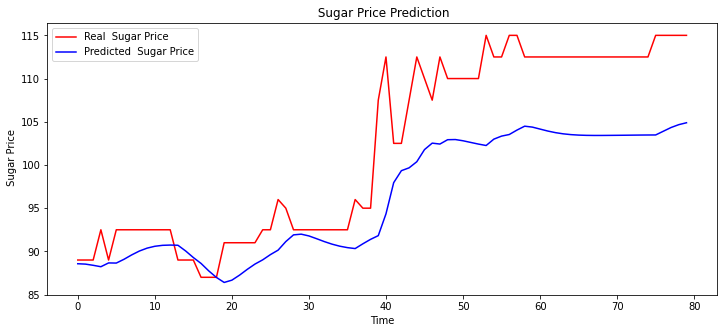

In [171]:
plt.plot(original, color = 'red', label = 'Real  Sugar Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Sugar Price')
plt.title(' Sugar Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Sugar Price')
plt.legend()
plt.show()

In [172]:
mean_absolute_error(original, pred)

5.853589725494385

In [173]:
mean_squared_error(original, pred)

50.85712302822431

In [174]:
rmse(pred, original)

7.131418023662917